In [1]:
import FFT

In [32]:
f = FFT.calculate_frequency(r"2cm.csv")
F = FFT.calculate_frequency(r"1cm.csv")
f3 = FFT.calculate_frequency(r"3cm.csv")

In [33]:
f,F,f3

(3.717948717948718, 0.125, 2.4)

In [22]:
B = ((250e6)/5)*3.3
t = 1e-3
c = 3e8

In [25]:
B = ((250e6)/5)*3.3
c = 3e8
dcm = (f*c*t)/(2*B)*100

In [34]:
B = ((250e6)/5)*3.3
c = 3e8
tcm = (f3*c*t)/(2*B)*100

In [35]:
B = ((250e6)/5)*3.3
c = 3e8
cm =(F*c*t)/(2*B)*100

In [36]:
dcm,cm,tcm

(0.33799533799533804, 0.011363636363636364, 0.2181818181818182)

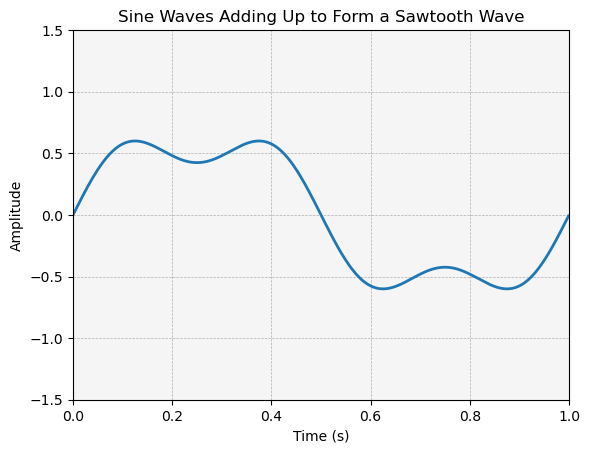

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# 設定參數
sampling_rate = 1000  # 取樣率
duration = 1.0        # 每個週期的持續時間 (秒)
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# 初始化波形
y = np.zeros_like(t)

# 創建圖形
fig, ax = plt.subplots()
line, = ax.plot(t, y, lw=2)
ax.set_ylim(-1.5, 1.5)
ax.set_xlim(0, duration)
ax.set_title("Sine Waves Adding Up to Form a Sawtooth Wave")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Amplitude")

# 調整背景和網格
ax.set_facecolor('#f5f5f5')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# 設定頻率逐漸增加
frequency = 1

def update(frame):
    global y, frequency
    # 新增高頻正弦波並疊加到波形上
    y += (2 / np.pi) * (np.sin(2 * np.pi * frequency * t) / frequency)
    line.set_ydata(y)
    frequency += 2  # 逐步增加頻率
    return line,

# 創建動畫
ani = animation.FuncAnimation(fig, update, frames=range(1, 50), blit=True, interval=200, repeat=False)

# 顯示動畫
plt.show()
ani.save("sine_wave_adding.gif", writer='pillow')
